# This notebook aims to analyse the file coming from the script score_conservation.py

In [1]:
import os
from matplotlib import pyplot as plt
import pandas as pd

In [3]:
# This section is for 1A53 Core 
directory = "/Volumes/Nia_HardDrive/Distal/1A53_Core/Blast/"
colnames = ['Residue_Number','Score','Residue_Identities']
df = pd.read_csv(directory + '1A53_Core_Scores.txt',  sep='\t',comment='#',header=None,names = colnames)
df['Residue_Number'] = df['Residue_Number'] +1

In [4]:
df

,Residue_Number,Score,Residue_Identities
0,1,-1000.0,PPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPP-PPPPP-...
1,2,-1000.0,RRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRR-RRRRR-...
2,3,-1000.0,YYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYY-YYYYY-...
3,4,-1000.0,LLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLL-LLLLL-...
4,5,-1000.0,KKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKK-KKKKK-...
...,...,...,...
255,256,-1000.0,HH--------------------------------------------...
256,257,-1000.0,HH--------------------------------------------...
257,258,-1000.0,HH--------------------------------------------...
258,259,-1000.0,HH--------------------------------------------...


177 43 40


<BarContainer object of 260 artists>

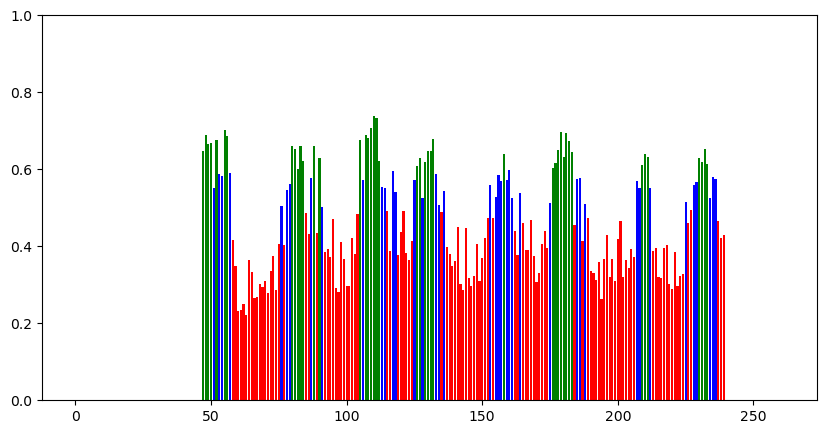

In [5]:
fig = plt.figure(figsize = (10, 5))
col = []
y = df['Score']

varied = 0
con_var = 0
conserved = 0


for val in y:
    if val <= 0.5: #below 0.5 is varied
        col.append('red')
        varied +=1
    elif val >= 0.6: # above 0.6 is conserved
        col.append('green')
        conserved +=1
    else: 
        col.append('blue')
        con_var +=1

print(varied,conserved,con_var)

plt.ylim(0,1)
plt.bar(df['Residue_Number'],df['Score'],color=col)

In [110]:
# Function to give % of each amino acid in the input alignment
def compute_percentage(input_str):
    # Initialize an empty dictionary to store character counts
    char_counts = {}

    # Count the occurrences of each character
    for char in input_str:
        if char in char_counts:
            char_counts[char] += 1
        else:
            char_counts[char] = 1

    # Compute the percentage for each character
    total_length = len(input_str)
    char_percentages = {char: (count / total_length) * 100 for char, count in char_counts.items()}

    return char_percentages



In [6]:
# Get list of residues that you know is gonna be okay to mutate

varied_residues = []
convar_residues = []
conserved_residues = []


varied = 0
convar = 0
conserved = 0


for i in range(len(df)):
    
    if df['Score'][i] <= 0.5: #below 0.5 is varied
        varied +=1
        varied_residues.append(df['Residue_Number'][i])
    
    elif df['Score'][i] >= 0.6: #above 0.6 is conserved
        conserved_residues.append(df['Residue_Number'][i])
        conserved +=1
    
    else: 
        convar_residues.append(df['Residue_Number'][i])
        convar +=1


print(varied,conserved,convar)


177 43 40


In [2]:
# Make a list of distal residues
distal_file = "/Volumes/Nia_HardDrive/Distal/1A53_Core/1A53_Core_Distal_Positions.txt"
with open(distal_file,'r') as dist:
    distal_residues = dist.read().splitlines()
distal_residues=[int(x) for x in distal_residues]
len(distal_residues)

201

In [8]:
# Find which residues are both Distal and non-conserved!

non_conserved = varied_residues + convar_residues
print(len(non_conserved))

Distal_NonConserved = []
for element in distal_residues:
    if element in non_conserved:
        Distal_NonConserved.append(element)
 
#print(Distal_NonConserved)
print(len(Distal_NonConserved))


217
191


In [3]:
#  Make a list of distal residues
# Define the file name
file_name = "/Volumes/Nia_HardDrive/Distal/1A53_Core/1A53_Core_Unbound_SPM.txt"

# Create an empty set to store unique residues
unique_residues = set()

# Open and read the file
with open(file_name, 'r') as f:
    next(f)  # skip the header
    for line in f:
        # Split the line by spaces and extract the residues
        residue1, residue2 = line.split()[0], line.split()[1]
        
        # Add the residues to the set
        unique_residues.add(residue1)
        unique_residues.add(residue2)

# Convert the set to a list
SPM_residues = list(unique_residues)
print(len(SPM_residues))
SPM_residues=[int(x) for x in SPM_residues]



41


In [4]:
# Find which residues are both Distal and SPM!


Distal_SPM = []
for element in distal_residues:
    if element in SPM_residues:
        Distal_SPM.append(element)
 
print(len(Distal_SPM))


17


In [11]:
# Write pymol script to visualize Distal_SPM and Distal_NonConserved!

with open("/Volumes/Nia_HardDrive/Distal/1A53_Core/Visualize_Design.py",'w') as pymol_file:
    pymol_file.write('''# How I selected Distal positions for 1A53_Core
cmd.load("1A53_Core_Bound_Renum.pdb","1A53_Core_Bound_Renum")

# Remove alternate conformations
cmd.create("alternateA","1A53_Core_Bound_Renum and not alt 'B'")

# Core is defined all residues that have any atom within 8 A of TSA
cmd.select("Core", "byres alternateA within 8 of resn 6NT")

# Distal is anything that is not core
cmd.select("Distal","alternateA and not Core")

# Now let's show the Distal_NonConserved
cmd.select("Distal_NonConserved","resi %s") 

# Now let's show the Distal_NonConserved
cmd.select("Distal_SPM","resi %s") 

cmd.show('spheres','Distal_NonConserved and name ca')
cmd.show('spheres','Distal_SPM and name ca')

cmd.color('pink','Distal_NonConserved')
cmd.color('blue','Distal_SPM')




''' %(str('+'.join(map(str,Distal_NonConserved))),str('+'.join(map(str,Distal_SPM)))))
    


In [157]:
pwd

'/Volumes/Nia_HardDrive/Distal/HG3_Core/Blast'

In [14]:
# Write two types of PMPNN Submission List

with open("/Volumes/Nia_HardDrive/Distal/1A53_Core/PMPNN/1A53_Core_Distal_Nonconserved_PMPNN.sh",'w') as infile:
            infile.write('''#!/bin/bash
#SBATCH --account=def-rchica
#SBATCH --gpus-per-node=1
#SBATCH --mem=10G               # memory per node
#SBATCH --time=0-01:00
#SBATCH --output=%s_NC.out

source /home/niayesh/ProteinMPNN/mlfold/bin/activate

folder_with_pdbs="/home/niayesh/scratch/Distal/P_Input/%s_NC/"

output_dir="/home/niayesh/scratch/Distal/P_Output/%s_NC/"
if [ ! -d $output_dir ]
then
    mkdir -p $output_dir
fi

path_for_parsed_chains=$output_dir"/parsed_pdbs.jsonl"
path_for_assigned_chains=$output_dir"/assigned_pdbs.jsonl"
path_for_fixed_positions=$output_dir"/fixed_pdbs.jsonl"

chains_to_design="A"

#The first amino acid in the chain corresponds to 1 and not PDB residues index for now.
design_positions="%s" ##design only these residues; use flag --specify_non_fixed


python /home/niayesh/ProteinMPNN/helper_scripts/parse_multiple_chains.py --input_path=$folder_with_pdbs --output_path=$path_for_parsed_chains

python /home/niayesh/ProteinMPNN/helper_scripts/assign_fixed_chains.py --input_path=$path_for_parsed_chains --output_path=$path_for_assigned_chains --chain_list "$chains_to_fix"

python /home/niayesh/ProteinMPNN/helper_scripts/make_fixed_positions_dict.py --input_path=$path_for_parsed_chains --output_path=$path_for_fixed_positions --chain_list "$chains_to_design" --position_list "$design_positions" --specify_non_fixed

python /home/niayesh/ProteinMPNN/protein_mpnn_run.py \\
        --jsonl_path $path_for_parsed_chains \\
        --chain_id_jsonl $path_for_assigned_chains \\
        --fixed_positions_jsonl $path_for_fixed_positions \\
        --out_folder $output_dir \\
        --num_seq_per_target 10 \\
        --sampling_temp "0.1" \\
        --batch_size 1
''' % ("1A53_Core","1A53_Core","1A53_Core",str(' '.join(map(str,Distal_NonConserved)))))

In [13]:
# Write two types of PMPNN Submission List

with open("/Volumes/Nia_HardDrive/Distal/1A53_Core/PMPNN/1A53_Core_Distal_SPM_PMPNN.sh",'w') as infile:
            infile.write('''#!/bin/bash
#SBATCH --account=def-rchica
#SBATCH --gpus-per-node=1
#SBATCH --mem=10G               # memory per node
#SBATCH --time=01-00:00
#SBATCH --output=%s_SPM.out

source /home/niayesh/ProteinMPNN/mlfold/bin/activate

folder_with_pdbs="/home/niayesh/scratch/Distal/P_Input/%s_SPM/"

output_dir="/home/niayesh/scratch/Distal/P_Output/%s_SPM/"
if [ ! -d $output_dir ]
then
    mkdir -p $output_dir
fi

path_for_parsed_chains=$output_dir"/parsed_pdbs.jsonl"
path_for_assigned_chains=$output_dir"/assigned_pdbs.jsonl"
path_for_fixed_positions=$output_dir"/fixed_pdbs.jsonl"

chains_to_design="A"

#The first amino acid in the chain corresponds to 1 and not PDB residues index for now.
design_positions="%s" ##design only these residues; use flag --specify_non_fixed


python /home/niayesh/ProteinMPNN/helper_scripts/parse_multiple_chains.py --input_path=$folder_with_pdbs --output_path=$path_for_parsed_chains

python /home/niayesh/ProteinMPNN/helper_scripts/assign_fixed_chains.py --input_path=$path_for_parsed_chains --output_path=$path_for_assigned_chains --chain_list "$chains_to_fix"

python /home/niayesh/ProteinMPNN/helper_scripts/make_fixed_positions_dict.py --input_path=$path_for_parsed_chains --output_path=$path_for_fixed_positions --chain_list "$chains_to_design" --position_list "$design_positions" --specify_non_fixed

python /home/niayesh/ProteinMPNN/protein_mpnn_run.py \\
        --jsonl_path $path_for_parsed_chains \\
        --chain_id_jsonl $path_for_assigned_chains \\
        --fixed_positions_jsonl $path_for_fixed_positions \\
        --out_folder $output_dir \\
        --num_seq_per_target 10000 \\
        --sampling_temp "0.1" \\
        --batch_size 1
''' % ("1A53_Core","1A53_Core","1A53_Core",str(' '.join(map(str,Distal_SPM)))))